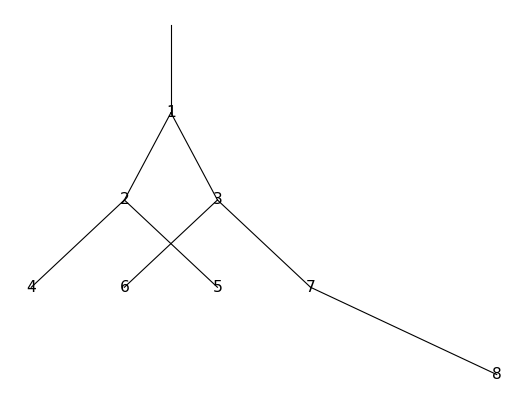

In [1]:
import matplotlib.pyplot as plt

# 定义树节点类
class TreeNode(object):
    def __init__(self, value):
        self.value = value
        self.left = None
        self.right = None

# 生成二叉树
def create_tree():
    root = TreeNode(1)
    node2 = TreeNode(2)
    node3 = TreeNode(3)
    node4 = TreeNode(4)
    node5 = TreeNode(5)
    node6 = TreeNode(6)
    node7 = TreeNode(7)
    node8 = TreeNode(8)

    root.left = node2
    root.right = node3
    node2.left = node4
    node2.right = node5
    node3.left = node6
    node3.right = node7
    node7.right = node8

    return root

# 可视化树结构
def plot_tree(node, x, y, parent_x, parent_y):
    if node is None:
        return

    # 绘制节点
    plt.plot([parent_x, x], [parent_y, y], linewidth=1.0, color='black')
    plt.text(x, y, str(node.value), fontsize=14, va='center', ha='center')

    # 计算子节点坐标
    left_x = x - 1.0/(2**y)
    right_x = x + 1.0/(2**y)
    left_y = y - 1
    right_y = y - 1

    # 绘制左子节点
    plot_tree(node.left, left_x, left_y, x, y)

    # 绘制右子节点
    plot_tree(node.right, right_x, right_y, x, y)

# 生成二叉树
root = create_tree()

# 设置绘图参数
fig = plt.figure(figsize=(8, 6), dpi=80)
plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1)
plt.axis('off')

# 可视化二叉树
plot_tree(root, 0.5, 5, 0.5, 6)

# 显示图像
plt.show()


In [2]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# 加载鸢尾花数据集
iris = load_iris()
X = iris.data
y = iris.target

# 将数据集分成训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 创建决策树分类器
clf = DecisionTreeClassifier()

# 在训练集上拟合决策树模型
clf.fit(X_train, y_train)

DecisionTreeClassifier()

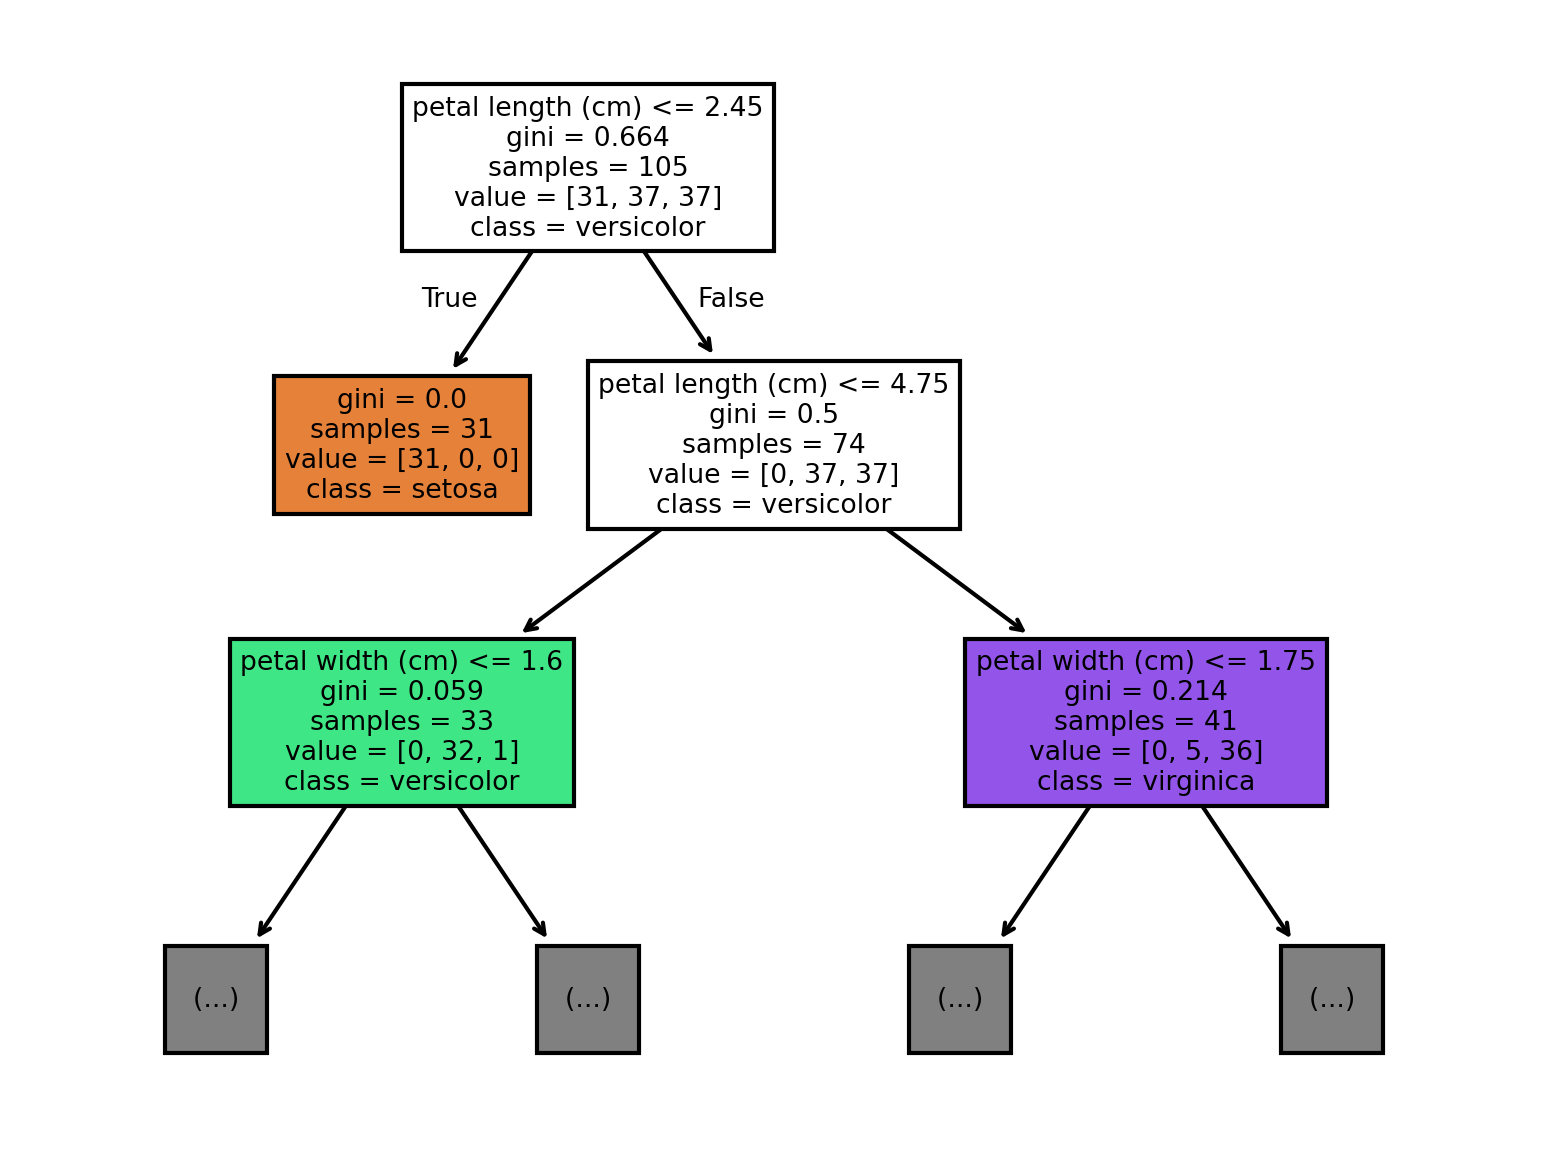

In [3]:
# 绘制决策树图形
plt.figure(dpi=300)
plot_tree(clf, filled=True, 
          max_depth=2,
          class_names=iris.target_names, feature_names=iris.feature_names)
plt.savefig('figs/5-2.png', dpi=300)
plt.show()

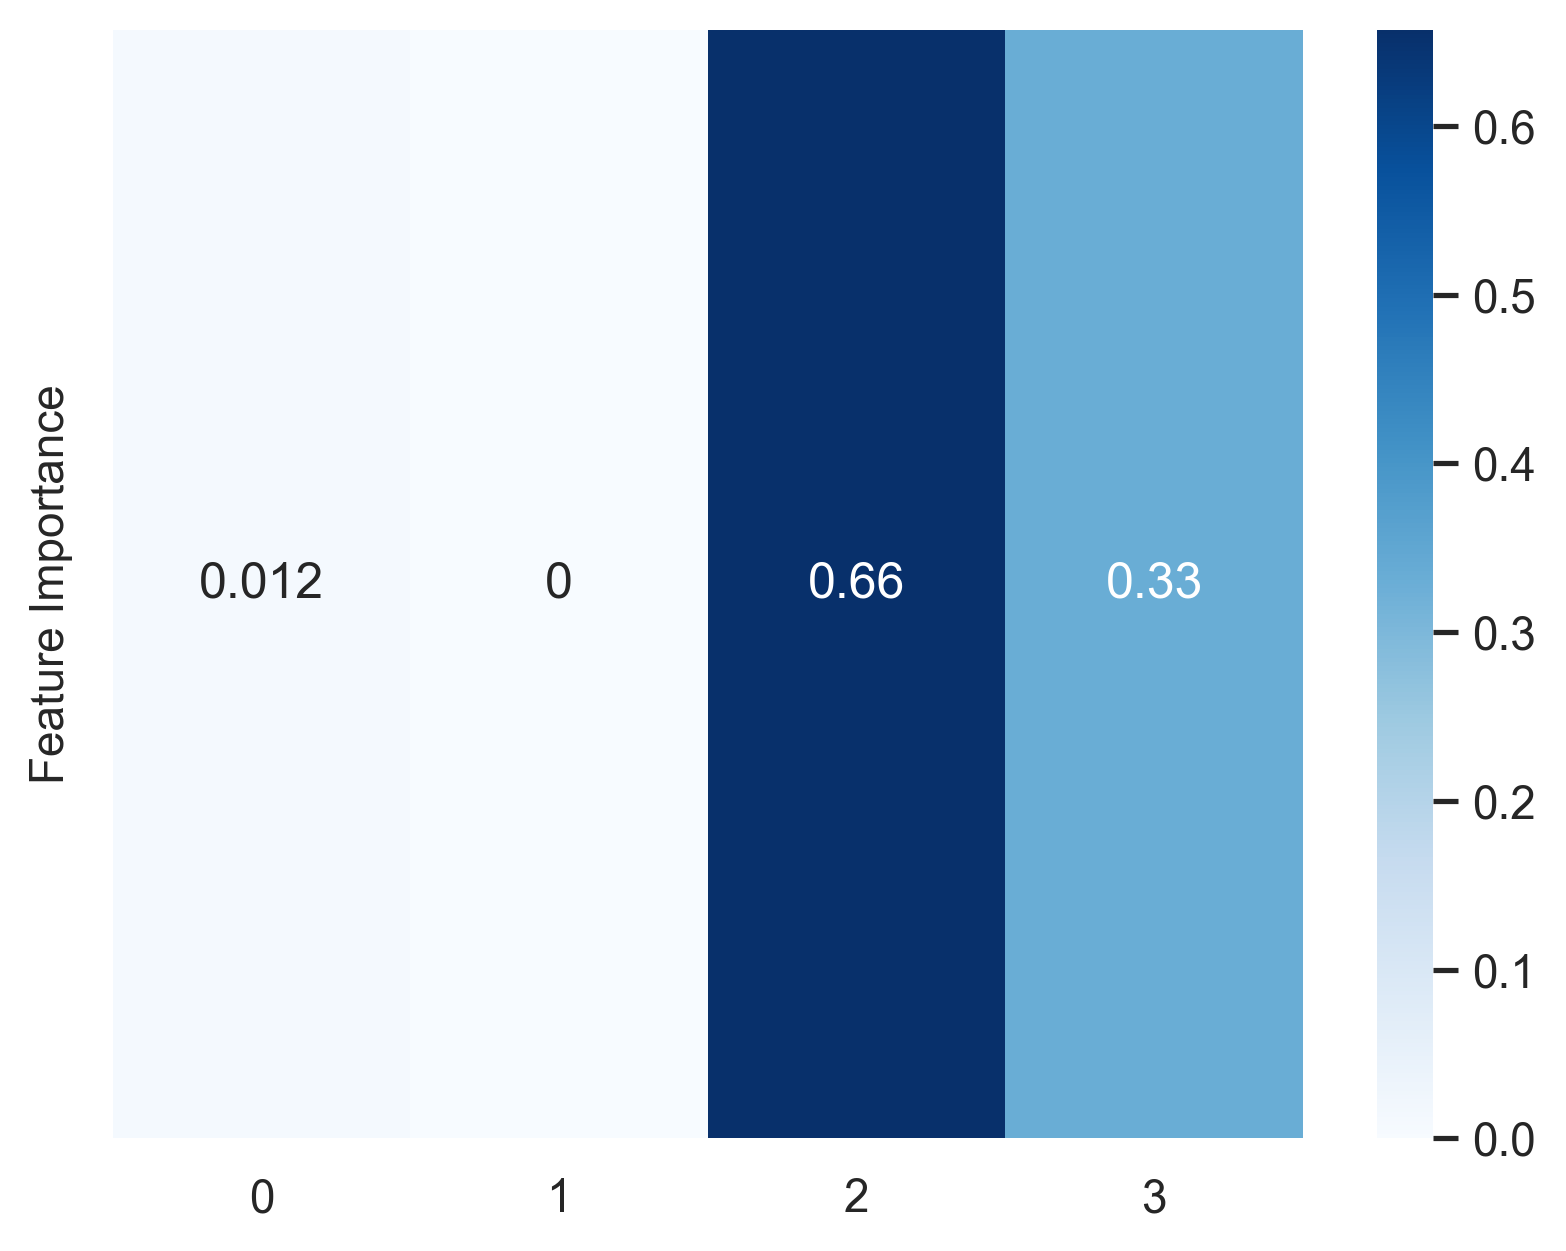

In [5]:
# 导入所需的库
import matplotlib.pyplot as plt  # Matplotlib 是一个用于创建高质量图表的 Python 库。
import numpy as np              # NumPy 是一个用于数值计算的 Python 库。
import seaborn as sns          # Seaborn 是基于 Matplotlib 的统计绘图库，提供了更高级别的接口。

# 加载数据集
iris = load_iris()             # load_iris() 函数从 scikit-learn 的内置数据集中加载鸢尾花数据集。

# 训练模型
clf = DecisionTreeClassifier(criterion='entropy')  # 创建一个决策树分类器实例，其中 criterion 参数设置为 'entropy' 表示使用信息熵作为划分标准。
clf.fit(iris.data, iris.target)                    # 使用 fit 方法训练决策树模型，传入数据集的特征 (iris.data) 和目标变量 (iris.target)。

# 特征重要性
feature_importances = clf.feature_importances_     # 从训练好的模型中获取特征的重要性。

# 绘制热力图
sns.set()                                          # 设置 seaborn 的默认样式。
fig, ax = plt.subplots(dpi=300)                    # 创建一个新的图形窗口，dpi 参数控制分辨率，300 表示每英寸 300 点。
sns.heatmap(feature_importances[np.newaxis,:],     # 使用 heatmap 函数绘制热力图。
            cmap="Blues",                          # 指定颜色映射为蓝色渐变。
            annot=True,                            # 在每个单元格中添加注释。
            ax=ax)                                 # 指定轴对象为之前创建的 ax。

ax.set_yticklabels(["Feature Importance"])         # 设置 y 轴的刻度标签。
plt.savefig('figs/5-3.png', dpi=300)               # 保存图形到文件 'figs/5-3.png'，dpi 参数控制输出文件的分辨率。
plt.show()                                         # 显示图形。


In [6]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer
import matplotlib.pyplot as plt

In [7]:
# 加载数据集
cancer = load_breast_cancer()

# 划分数据集
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=42)

In [8]:
# 构建决策树模型
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [9]:
# 对决策树进行后剪枝
# 这里我们使用 cost_complexity_pruning_path 函数来找到一系列的 ccp_alpha 值，
# 这些值可用于剪枝决策树模型。
path = dt.cost_complexity_pruning_path(X_train, y_train)
# cost_complexity_pruning_path 返回一个包含不同复杂度惩罚项（ccp_alpha）值的对象，
# 这些值可以用来对决策树进行剪枝。同时，它还返回了在每个 ccp_alpha 下的不纯度。
ccp_alphas, impurities = path.ccp_alphas, path.impurities

# 创建多个决策树模型，每个模型对应一个不同的 ccp_alpha 值
dts = []  # 初始化一个空列表来存储所有训练好的决策树模型
# 遍历所有找到的 ccp_alpha 值
for ccp_alpha in ccp_alphas:
    # 创建一个决策树分类器实例，指定随机种子为 42 以保证实验可重复性，
    # 并设置当前循环中的 ccp_alpha 值作为复杂度惩罚项。
    dt = DecisionTreeClassifier(random_state=42, ccp_alpha=ccp_alpha)
    # 使用训练数据拟合决策树模型
    dt.fit(X_train, y_train)
    # 将训练好的模型添加到列表中
    dts.append(dt)

In [10]:
# 计算每个决策树在测试集上的准确率
train_scores = [dt.score(X_train, y_train) for dt in dts]
test_scores = [dt.score(X_test, y_test) for dt in dts]

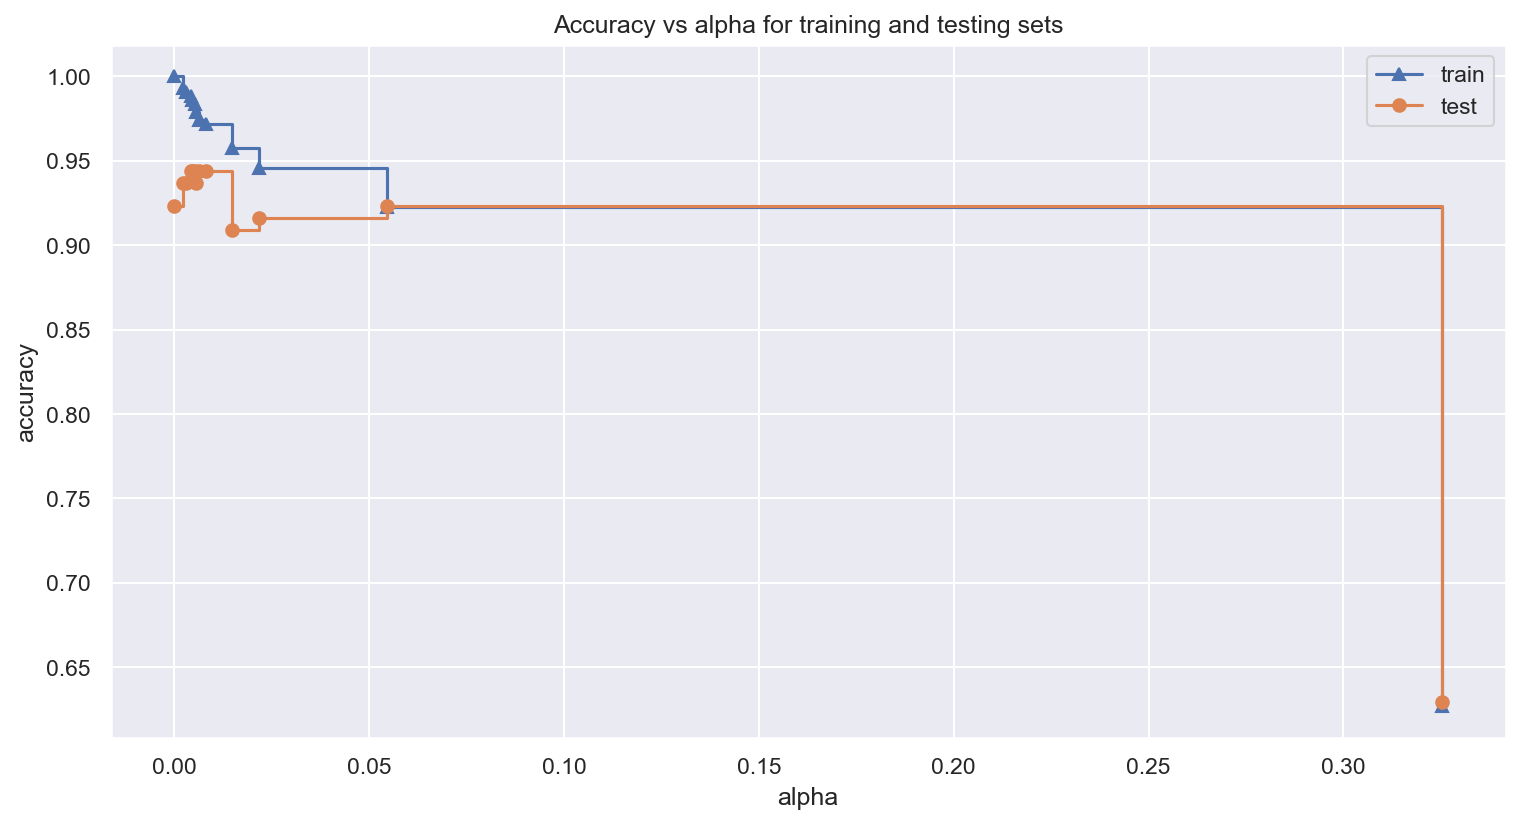

In [11]:
# 可视化剪枝前后决策树的性能比较
fig, ax = plt.subplots(figsize=(12,6),dpi=150)
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker='^', label="train",
        drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker='o', label="test",
        drawstyle="steps-post")
ax.legend()
plt.show()

# 

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor

# 生成数据
rng = np.random.RandomState(1)
X = np.sort(5 * rng.rand(80, 1), axis=0)
y = np.sin(X).ravel()
y[::5] += 3 * (0.5 - rng.rand(16))

# 训练模型
regr_1 = DecisionTreeRegressor(max_depth=2)
regr_2 = DecisionTreeRegressor(max_depth=5)
regr_1.fit(X, y)
regr_2.fit(X, y)

# 预测
X_test = np.arange(0.0, 5.0, 0.01)[:, np.newaxis]
y_1 = regr_1.predict(X_test)
y_2 = regr_2.predict(X_test)

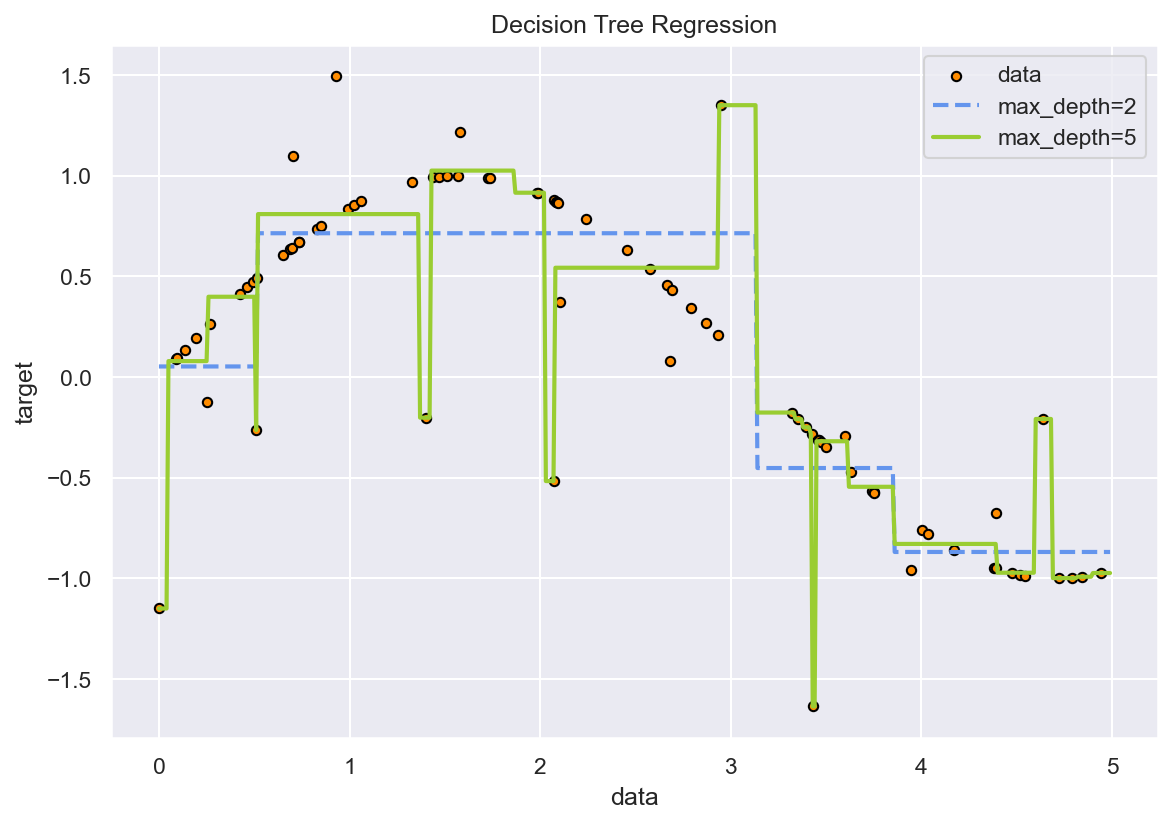

In [13]:
# 可视化
plt.figure(figsize=(9,6),dpi=150)
plt.scatter(X, y, s=20, edgecolor="black", c="darkorange", label="data")
plt.plot(X_test, y_1, color="cornflowerblue", label="max_depth=2", linewidth=2, linestyle='--')
plt.plot(X_test, y_2, color="yellowgreen", label="max_depth=5", linewidth=2)
plt.xlabel("data")
plt.ylabel("target")
plt.title("Decision Tree Regression")
plt.legend()
plt.show()